# Точечное оценивание

# Небольшое напоминание

## Свойства оценок

Пусть $X_1, ..., X_n$ -- выборка объема $n$ из семейства распределений $\mathbf{\mathcal{P}}_{\theta}$, $\theta \in \mathsf{\Theta}$. Статистикой (или оценкой) параметра $\theta$ называется произвольная функция

$$
\widehat \theta = \widehat \theta(X_1, ..., X_n),
$$

являющаяся случайной величиной.

**Несмещенность оценки**

Статистика $\widehat \theta = \widehat \theta(X_1, ..., X_n)$ называется несмещенной оценкой параметра $\theta$, если для любого $\theta \in \mathsf \Theta$ справедливо равенство $$\mathsf E_\theta \widehat \theta = \theta.$$


**Асимптотическая несмещенность оценки**

Статистика $\widehat \theta = \widehat \theta(X_1, ..., X_n)$ называется асимптотически несмещенной оценкой параметра $\theta$, если для любого $\theta \in \mathsf \Theta$ выполняется

$$\mathsf E_\theta \widehat \theta \xrightarrow[n \to \infty]{} \theta.$$

**Состоятельность оценки**

Статистика $\widehat \theta = \widehat \theta(X_1, ..., X_n)$ называется состоятельной оценкой параметра $\theta$, если для любого $\theta \in \mathsf \Theta$ выполняется

$$\widehat \theta \xrightarrow[n \to \infty]{\mathsf P} \theta.$$

## Метод моментов

Пусть $X_1, ..., X_n$ -- выборка объема $n$ из параметрического семейства распределений $\mathcal{P}_\theta$, $\theta \in \mathsf \Theta \subset \mathbb{R}$. Пусть функция $g: \mathbb{R} \to \mathbb{R}$ такова, что существует момент

$$
\mathsf E_\theta g(X_1) = f(\theta),
$$

а функция $f$ обратима на множестве $\Theta$ (напомним, что нам нужна обратимость, чтобы выразить $\theta$ через $\mathsf E_\theta g(X_1)$). Разрешим выписанное соотношение относительно $\theta$ и получим

$$
\theta = f^{-1}\left( \mathsf E_\theta g(X_1) \right).
$$

Подставим вместо теоретического момента $\mathsf E_\theta g(X_1)$ его выборочный аналог $\overline{g(X)}$, откуда получим оценку $\widehat \theta$ параметра $\theta$ вида

$$
\widehat \theta = f^{-1}\left( \overline{g(X)}\right) = f^{-1}\left( \frac{1}{n}\sum\limits_{i = 1}^n g(X_i)\right).
$$

Оценка $\widehat \theta$ параметра $\theta$, полученная по описанной выше схеме, называется оценкой метода моментов (ОММ) для параметра $\theta$.

Чаще всего рассматривают моменты $k$-ого порядка, а потому берут функции $g(t) = t^k$, $k \in \{1, 2, ... \}$. В этом случае

$$
\mathsf E_\theta X_1^k = f(\theta),
$$

и если функция $f(\theta)$ обратима, то, согласно описанной выше идее, мы приходим к соотношению

$$
\widehat \theta = f^{-1}\left(\frac{1}{n}\sum\limits_{i = 1}^n X_i^k\right).
$$

## Метод максимального правдоподобия

Функция

$$
f_\theta(\vec{X}) = f_\theta(X_1)\cdot f_\theta(X_2)\cdot...\cdot f_\theta(X_n) = \prod\limits_{i = 1}^n f_\theta(X_i)
$$

называется **функцией правдоподобия**.


Заметим, что в случае, когда генеральная совокупность имеет дискретное распределение, функция правдоподобия переписывается в виде

$$
f_\theta(\vec{X}) = \mathsf P_\theta(X_1 = x_1) \cdot \mathsf P_\theta (X_2 = x_2) \cdot ... \cdot \mathsf P_\theta(X_n = x_n).
$$


Введенную функцию правдоподобия нам нужно максимизировать. Для этого, например, можно пытаться использовать дифференциальное исчисление функции одной (если параметр $\theta$ -- скаляр) или нескольких (если $\theta$ -- вектор) переменных. Что же называется оценкой оцениваемого параметра $\theta$?

**Оценкой максимального правдоподобия (ОМП)** $\widehat \theta$ параметра $\theta$ называется такое значение $\widehat \theta \in \Theta$, при котором функция $f_{\widehat \theta}(\vec{X})$ достигает локального максимума.


Вместе с функцией правдоподобия рассмотрим так называемую **логарифмическую функцию правдоподобия**.

Функция

$$
L_\theta(\vec{X}) = \ln f_\theta(\vec{X}) = \sum\limits_{i = 1}^n \ln f_\theta(X_i)
$$

называется логарифмической функцией правдоподобия.

Как и ранее отметим, что поскольку функция $\ln t$ монотонна, то точки экстремума функций $f_\theta(\vec{X})$ и $L_\theta(\vec{X})$ совпадают. Поэтому оценкой максимального правдоподобия можно назвать не только точку максимума функции правдоподобия, но и точку максимума логарифмической функции правдоподобия.

Еще раз акцентируем внимание на том, что мы ищем не максимум функции, а аргумент, при котором исследуемая функция имеет максимум. По этим соображениям для ОМП часто пишут следующее определение:

$$
\widehat \theta = argmax_{\theta}f_\theta(\vec{X}) = argmax_\theta L_\theta(\vec{X}).
$$

# Практическая часть

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm.notebook import tqdm
import math
import scipy.stats as sps

## Задача 1

Пусть $X_1, ..., X_n$ — выборка из распределения Бернулли $\mathsf B_\theta$ с параметром $\theta \in (0,1)$.

1. Построить оценки параметра $\theta$ по первому и второму моментам.
2. Построить оценку по второму центральному моменту.
3. Получить оценку параметра $\theta$ методом максимального правдоподобия.

### Решение

**Метод моментов**

Если генеральная совокупность $\xi$ имеет распределение Бернулли $\mathsf B_\theta$, то $\mathsf E_\theta \xi = \theta$ и $\mathsf D_\theta \xi = \theta(1 - \theta)$. Тогда

$$
\mathsf E_\theta X_1 = \theta,
$$

а значит оценка по первому моменту — это оценка $\widehat{\theta_1} = \overline{X}$.

Далее, так как

$$
\mathsf E_\theta X_1^2 = \mathsf D_\theta X_1 + \left(\mathsf E_\theta X_1 \right)^2 = \theta(1-\theta)+\theta^2 = \theta,
$$

то оценка по второму моменту — это оценка $\widehat{\theta_2} = \overline{X^2}$. Легко понять, что эта оценка совпадает с $\overline{X}$, так как $X_i^2 = X_i$. Кстати, из этих соображений следует, что оценка по любому моменту будет совпадать с оценкой по первому моменту, то есть с $\overline{X}$.

Можно рассмотреть и другие варианты. Например, из соотношения

$$
\mathsf D\xi = \theta(1-\theta),
$$

следует, что
$$
    \widehat{\theta}-\widehat{\theta}^2-S^2=0\quad\Longrightarrow\quad \widehat \theta_{2,3}=\dfrac{1\pm \sqrt{1-4S^2}}{2}.
$$


**Замечание**

Интересно, что мы получили $2$, вообще говоря разные оценки параметра $\theta$. В целом понятно, что одна и них является оценкой $\theta$, а вторая — оценкой $(1-\theta)$ — в силу симметричности выражения для $\mathbb D \xi$. В то же время непонятно, какая из полученных оценок что оценивает. Учитывая, что в случае распределения Бернулли $\overline{X^2} = \overline{X}$, можно показать, что оценка для $\theta$ в случае $\theta_{2,3}$ также будет совпадать с $\overline{X}$.

Можно составить ещё одну оценку:

$$
\dfrac{\mathsf D\xi}{\mathsf E\xi}=1-\theta\quad\Rightarrow\quad \widehat\theta=1-\dfrac{S^2}{\overline X}.
$$

Однако, также учитывая, что в случае распределения Бернулии $\overline{X^2} = \overline{X}$, имеем, что

$$
\widehat\theta = 1-\dfrac{S^2}{\overline X} = \frac{\overline{X}-\overline{X^2} - \overline{X}^2}{\overline{X}} = \overline X.
$$

**Метод максимального правдоподобия**

Пусть $X_1, ..., X_n$ -- выборка объема $n$ из распределения Бернулли. Составим функцию правдоподобия:

$$f_{\theta}(\vec{X})=\prod\limits_{i=1}^n\mathsf P_\xi(X=X_i)=$$
    
$$
=\theta^{X_1}(1-\theta)^{1-X_1}\cdot\theta^{X_2}(1-\theta)^{1-X_2}\cdot\dots\cdot \theta^{X_n}(1-\theta)^{1-X_n}=
$$

$$
=\theta^{\sum\limits_{i=1}^nX_i}(1-\theta)^{n-\sum\limits_{i=1}^n X_i}=\theta^{n\overline X}(1-\theta)^{n-n\overline X}.
$$

Тогда

$$
L_\theta(\vec{X}) = \ln f_\theta(\vec{X})=n\overline X\ln\theta +(n-n\overline X)\ln(1-\theta).
$$

Найдем с помощью необходимого условия экстремума подходящую оценку параметра.

$$
L'_\theta(\vec{X})=\dfrac{n\overline X}{\theta}+\dfrac{n-n\overline X}{\theta-1}=\dfrac{n\theta-n\overline X}{\theta(1-\theta)}=0
$$

Тогда, если показать, что найденная точка — действительно точка экстремума (например, проверить знак второй производной), то

$$
\widehat\theta=\overline X.
$$


  0%|          | 0/99 [00:00<?, ?it/s]

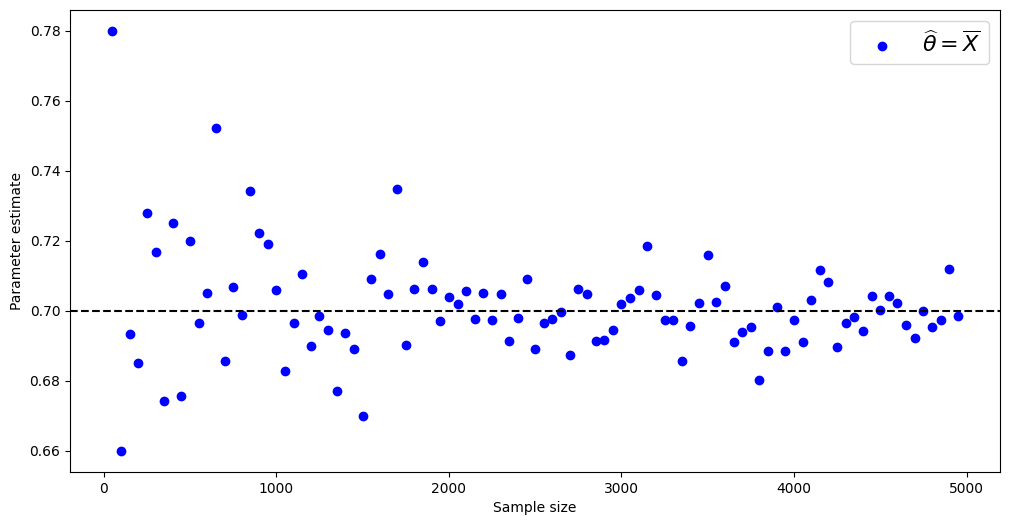

In [2]:
# @title Эксперименты
# Plt params
plt.rcParams['text.usetex'] = True
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
np.random.seed(42)
plt.figure(figsize=(12, 6))

# Parameters
p = 0.7
max_sample_size = 5000
step = 50
theta_arr = []

# Generation
for sample_size in tqdm(range(step, max_sample_size, step)):
    sample = np.random.binomial(1, p, size = sample_size)
    theta_arr.append(sample.mean())


# Plotting
plt.scatter(list(range(step, max_sample_size, step)), theta_arr, color = 'blue', label=r'$\widehat{\theta} = \overline{X}$')
plt.axhline(y = p, color = 'black', linestyle = '--')
plt.xlabel('Sample size')
plt.ylabel('Parameter estimate')
plt.legend(prop={'size': 16}, loc=1)
plt.show()

## Задача 2

С помощью метода моментов и ММП оценить параметр $\theta$ распределения $\xi\sim\mathsf{Bin}_{m, \theta}$ при условии, что $m$ нам известен.

### Решение

**Метод моментов**

$$
\mathsf P(X=x)=C^{x}_m\cdot \theta ^{x}\cdot(1-\theta)^{m-x},\quad x\in\{0,1,\dots,m\}
$$

$$
\mathsf E\xi=m\theta,\quad\quad\quad \mathsf D\xi=m\theta (1-\theta).
$$

Из этих соотношений следует, что

$$
\overline X=m\widehat\theta, \quad\quad\quad S^2=m\widehat\theta-m\widehat\theta^2,
$$

а значит

$$
\widehat \theta_1=\dfrac{\overline X}{m}
$$

$$
\widehat\theta_{2,3}=\dfrac{1\pm\sqrt{1-4\dfrac{S^2}{m}}}{2}
$$

Для $\widehat\theta_{2,3}$ ситуация такая же, как в прошлой задаче: какая-то из двух оценок реально оценивает $\theta$, другая же оценивает $1-\theta$.

**Метод максимального правдоподобия**

Так как $\mathsf P_\theta (\xi = X_i) = C_m^{X_i} \theta^{X_i}(1 - \theta)^{m - X_i}$, то функция правдоподобия принимает вид

$$
f_\theta(\vec{X}) = \prod\limits_{i = 1}^n C_m^{X_i} \cdot \theta^{n \overline{X}}(1 - \theta)^{mn - n \overline{X}}.
$$

Тогда логарифмическая функция правдоподобия задается соотношением

$$
L_\theta(\vec{X}) = \ln \prod\limits_{i = 1}^n C_m^{X_i} + n \overline{X} \ln \theta + (mn - n \overline{X}) \ln(1 - \theta).
$$

Ее производная по $\theta$ равна

$$
\left( L_\theta(\vec{X}) \right)'_\theta = \frac{n \overline{X}}{\theta} - \frac{mn - n \overline{X}}{1 - \theta}.
$$

Из условия равенства нулю производной находим, что $\theta = \frac{\overline{X}}{m}$ — точка, подозрительная на экстремум. Легко удостовериться, что она и правда является точкой максимума, а значит

$$
\widehat \theta = \frac{\overline{X}}{m}.
$$

  0%|          | 0/99 [00:00<?, ?it/s]

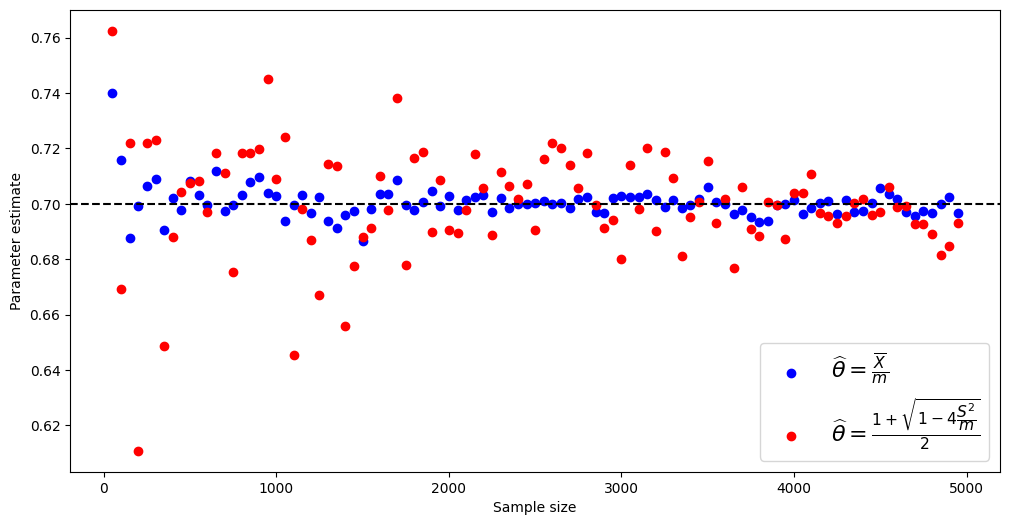

In [3]:
# @title Эксперименты
# Plt params
plt.rcParams['text.usetex'] = True
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
np.random.seed(42)
plt.figure(figsize=(12, 6))

# Parameters
p = 0.7
m = 7
max_sample_size = 5000
step = 50
theta_arr = []
theta_arr_2 = []

# Generation
for sample_size in tqdm(range(step, max_sample_size, step)):
    sample = np.random.binomial(m, p, size = sample_size)
    theta_arr.append(sample.mean() / m)
    theta_arr_2.append((1+np.sqrt(1-4*sample.var()/m))/2)


# Plotting
plt.scatter(list(range(step, max_sample_size, step)), theta_arr, color = 'blue', label=r'$\widehat{\theta} = \frac{\overline{X}}{m}$')
plt.scatter(list(range(step, max_sample_size, step)), theta_arr_2, color = 'red', label=r'$\widehat{\theta} = \frac{1 + \sqrt{1-4\dfrac{S^2}{m}}}{2}$')
plt.axhline(y = p, color = 'black', linestyle = '--')
plt.xlabel('Sample size')
plt.ylabel('Parameter estimate')
plt.legend(prop={'size': 16}, loc=4)
plt.show()

## Задача 2 (bonus)

Пусть $X_1, X_2, ..., X_n$ — выборка из биномиального распределения $\mathsf{Bin}_{m, \theta}$ с параметрами $m \in \mathbb{N}$ и $\theta \in (0, 1)$. Построить оценки параметров $m$ и $p$ методом моментов.

### Решение

Если генеральная совокупность $\xi$ имеет биномиальное распределение $ \mathsf{Bin}_{m, \theta}$, то $\mathsf E_\theta \xi = m \theta$ и $\mathsf D_\theta \xi = m \theta (1 - \theta)$. Тогда

$$
\begin{cases}
\mathsf E_\theta X_1 = m \theta \\
\mathsf E_\theta X_1^2 =  m \theta (1 - \theta) + m^2 \theta^2
\end{cases}
\Leftrightarrow
\begin{cases}
	\mathsf E_\theta X_1 = m \theta \\
\mathsf E_\theta X_1^2 =  \mathsf E_\theta X_1 (1 - \theta) + \left(\mathsf E_\theta X_1 \right)^2
\end{cases}
$$

Заменим истинные параметры на выборочные, получим

$$
\begin{cases}
\overline{X} = \widehat m \widehat  \theta	\\
\overline{X^2} = \overline{X}(1 - \widehat \theta) + \overline{X}^2
\end{cases}
$$

Из второго уравнения находим, что

$$
\widehat \theta = 1 + \frac{\overline{X}^2 - \overline{X^2}}{\overline{X}} = 1 - \frac{S^2}{\overline{X}}
$$

и, подставляя найденное в первое уравнение, получаем

$$
\widehat m = \frac{\overline{X}^2}{\overline{X} - S^2}.
$$

Заметьте, что $\widehat m$ должно быть целым числом, что на конкретной выборке может вовсе и не получиться. Правильной оценкой будет ближайшее целое число к $\widehat m$, то есть

$$
\widehat m = \arg\min\limits_{n \in \mathbb{Z}}\left|n - \frac{\overline{X}^2}{\overline{X} - S^2}\right|
$$

## Задача 3

Пусть $X_1, X_2, ..., X_n$ — выборка из геометрического распределения $\mathsf G_\theta$ с параметром $\theta \in (0, 1)$.
1. Методом моментов построить оценки параметра $\theta$ по первому и второму моментам.
2. Получить оценку параметра $\theta$ методом максимального правдоподобия.

### Решение

**Метод моментов**

Если генеральная совокупность $\xi$ имеет геометрическое распределение $ \mathsf G_\theta$, то $\mathsf E_\theta \xi = \frac{1}{\theta}$ и $\mathsf D_\theta \xi = \frac{1 - \theta}{\theta^2}$. Тогда, оценка по первому моменту получается из равенства

$$
\mathsf E_\theta X_1 = \frac{1}{\theta},
$$

откуда $\widehat{\theta_1} = \frac{1}{\overline{X}}$. Оценка по второму моменту получается из равенства

$$
\mathsf E_\theta X_1^2 = \mathsf D_\theta X_1 + \left(\mathsf E_\theta X_1 \right)^2 = \frac{1 - \theta}{\theta^2} + \frac{1}{\theta^2} = \frac{2 - \theta}{\theta^2},
$$

откуда

$$
\theta^2 \mathsf E_\theta X_1^2 + \theta - 2 = 0
$$

и

$$
\theta = \frac{-1 \pm \sqrt{1 + 8 \mathsf E_\theta X_1^2}}{2 \mathsf E_\theta X_1^2}.
$$

В силу области значений $\theta$, нам подходит только значение со знаком "плюс", а значит

$$
\widehat{\theta_2} = \frac{-1 + \sqrt{1 + 8 \overline{X^2}}}{2 \overline{X^2}}.
$$

**Метод максимального правдоподобия**

Так как $\mathsf P_\theta(\xi = X_i) = (1 - \theta)^{X_i - 1}\theta$, то
$$
f_\theta(\vec{X}) = \theta^n (1 -  \theta)^{n \overline{X} - n}
$$
и логарифмическая функция правдоподобия равна
$$
L_\theta(\vec{X}) = n \ln \theta + (n\overline{X} -  n)\ln( 1 -  \theta).
$$
Найдя производную, и приравняв ее к нулю, получаем уравнение
$$
\frac{n}{\theta} - \frac{n \overline{X} -  n}{1 -  \theta} = 0,
$$
из которого находим $\theta = \frac{1}{\overline{X}}$. Можно проверить, что найденная точка является точкой максимума, а потому
$$
\widehat \theta = \frac{1}{\overline{X}}
$$

  0%|          | 0/99 [00:00<?, ?it/s]

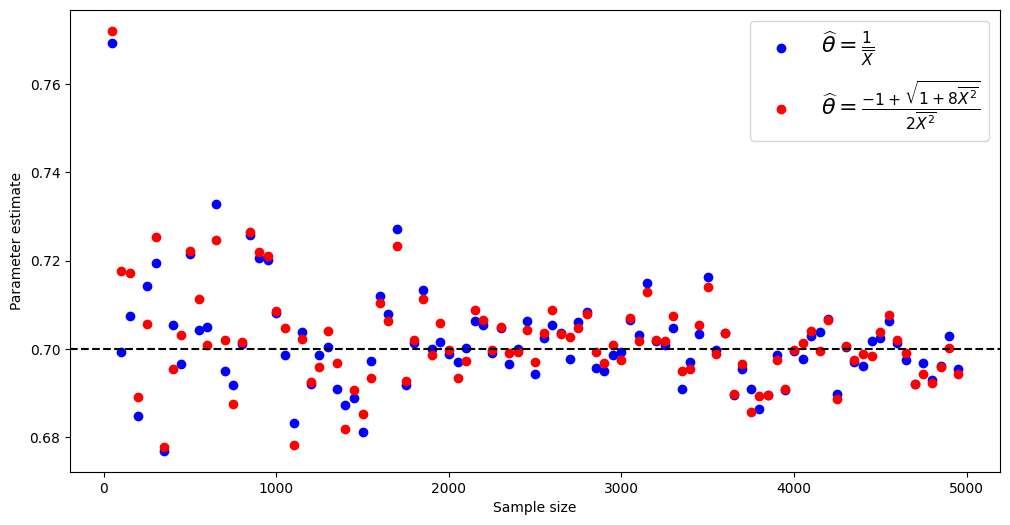

In [4]:
# @title Эксперименты
# Plt params
plt.rcParams['text.usetex'] = True
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
np.random.seed(42)
plt.figure(figsize=(12, 6))

# Parameters
p = 0.7
max_sample_size = 5000
step = 50
theta_arr = []
theta_arr_2 = []

# Generation
for sample_size in tqdm(range(step, max_sample_size, step)):
  sample = np.random.geometric(p, size = sample_size)
  theta_arr.append(1/sample.mean())
  theta_arr_2.append((-1+np.sqrt(1+8*(sample**2).mean())) / (2*(sample**2).mean()))


# Plotting
plt.scatter(list(range(step, max_sample_size, step)), theta_arr, color = 'blue', label=r'$\widehat{\theta} = \frac{1}{\overline{X}}$')
plt.scatter(list(range(step, max_sample_size, step)), theta_arr_2, color = 'red', label=r'$\widehat{\theta} = \frac{-1 + \sqrt{1 + 8 \overline{X^2}}}{2 \overline{X^2}}$')
plt.axhline(y = p, color = 'black', linestyle = '--')
plt.xlabel('Sample size')
plt.ylabel('Parameter estimate')
plt.legend(prop={'size': 16}, loc=1)
plt.show()

## Задача 4

Пусть $X_1, X_2, ..., X_n$ — выборка из распределения Пуассона $\mathsf \Pi_\theta$ с параметром $\theta > 0$.
1. Методом моментов построить оценки параметра $\theta$ по первому и второму моментам.
2. Получить оценку параметра $\theta$ методом максимального правдоподобия.

### Решение

**Метод моментов**

$$
\mathsf E_\theta X_1 = \theta.
$$

В нашей ситуации все очень просто, так как $\theta = \mathsf E_\theta X_1$. Заменяя истинное математическое ожидание на выборочное, получаем оценку
$$
\widehat \theta = \overline{X} = \frac{1}{n}\sum\limits_{i = 1}^n X_i.
$$
Давайте рассмотрим функцию $g(t) = t^2$. Воспользуемся тем, что для случайной величины $\xi$ с конечным вторым моментом справедливо равенство $\mathsf D_\theta \xi = \mathsf E_\theta \xi^2 - (\mathsf E_\theta \xi)^2$, откуда
$$
\mathsf E_\theta X_1^2 = \mathsf D_\theta X_1 + (\mathsf E_\theta X_1)^2 = \theta^2 + \theta.
$$
Функция $\theta^2 + \theta$ строго возрастает при $\theta > 0$, а потому обратима. Выразим $\theta$ через $\mathsf E_\theta X_1^2$, для этого решим уравнение (квадратное относительно $\theta$):
$$
\theta^2 + \theta - \mathsf E_\theta X_1^2 = 0.
$$
Из уравнения находим
$$
\theta = \frac{-1 \pm \sqrt{1 + 4 \mathsf E_\theta X_1^2}}{2}.
$$
Так как обращение происходило на множестве $\theta > 0$, то нам подходит только <<правый>> корень
$$
\theta = \frac{-1 + \sqrt{1 + 4 \mathsf E_\theta X_1^2}}{2}.
$$
Так как выборочной оценкой для $\mathsf E_\theta X_1^2$ является $\overline{X^2} = \frac{1}{n}\sum\limits_{i = 1}^n X_i^2$, то получаем итоговое соотношение
$$
\widehat \theta = \frac{-1 + \sqrt{1 + 4 \overline{X^2}}}{2}.
$$

**Метод максимального правдоподобия**

$$
f_\theta(t) = \mathsf P (X_1 = t) = \frac{\theta^t}{t!}e^{-\theta}, \ t \in \{0, 1, ... \}.
$$

Тогда функция правдоподобия принимает вид

$$
f_\theta(\vec{X}) = \prod_{i = 1}^nf_\theta(X_i) = \prod_{i = 1}^n \frac{\theta^{X_i}}{{X_i}!}e^{-\theta} = \frac{\theta^{X_1 + X_2 + ... + X_n}}{X_1! \cdot X_2! \cdot ... \cdot X_n!}e^{-n\theta}.
$$

Для нахождения точек максимума, рассмотрим логарифмическую функцию правдоподобия:

$$
L_\theta(\vec{X}) = \ln f_\theta(\vec{X}) = \ln\left( \frac{\theta^{X_1 + X_2 + ... + X_n}}{X_1! \cdot X_2! \cdot ... \cdot X_n!}e^{-n\theta} \right).
$$

По свойствам логарифма, последнее равенство перепишем в виде

$$
L_\theta(\vec{X}) = \ln \theta^{X_1 + X_2 + ... + X_n} + \ln e^{-n \theta} - \ln\left(X_1! \cdot X_2! \cdot ... \cdot X_n! \right) =
$$

$$
=\left(X_1 + X_2 + ... + X_n \right) \ln \theta - n\theta - \ln \prod\limits_{i = 1}^n X_i!.
$$

Рассматриваемая нами функция дифференцируема, а значит необходимым условием экстремума является равенство нулю производной по $\theta$. Значит, нужно решить уравнение

$$
\left(L_\theta(\vec{X})\right)'_\theta = 0 \text{ или } \frac{X_1 + X_2 + ... + X_n}{\theta} - n = 0,
$$

откуда (проверив достаточное условие экстремума),

$$
\widehat \theta = \frac{X_1 + X_2 + ... + X_n}{n} = \overline{X}.
$$

  0%|          | 0/99 [00:00<?, ?it/s]

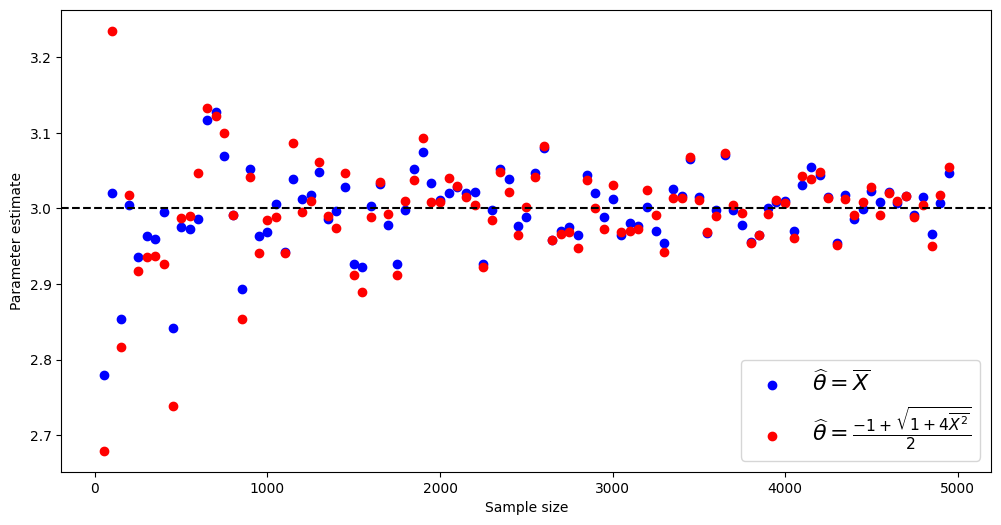

In [5]:
# @title Эксперименты
# Plt params
plt.rcParams['text.usetex'] = True
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
np.random.seed(42)
plt.figure(figsize=(12, 6))

# Parameters
p = 3
max_sample_size = 5000
step = 50
theta_arr = []
theta_arr_2 = []

# Generation
for sample_size in tqdm(range(step, max_sample_size, step)):
  sample = np.random.poisson(p, size = sample_size)
  theta_arr.append(sample.mean())
  theta_arr_2.append((-1+np.sqrt(1+4*(sample**2).mean())) / 2)


# Plotting
plt.scatter(list(range(step, max_sample_size, step)), theta_arr, color = 'blue', label=r'$\widehat{\theta} = \overline{X}$')
plt.scatter(list(range(step, max_sample_size, step)), theta_arr_2, color = 'red', label=r'$\widehat{\theta} = \frac{-1 + \sqrt{1 + 4 \overline{X^2}}}{2}$')
plt.axhline(y = p, color = 'black', linestyle = '--')
plt.xlabel('Sample size')
plt.ylabel('Parameter estimate')
plt.legend(prop={'size': 16}, loc=4)
plt.show()

## Задача 5

Пусть $X_1, X_2, ..., X_n$ — выборка из равномерного распределения $\mathsf U_{a, b}$ с параметрами $a < b$. Построить оценки параметров $a, b$:
1. Методом моментов.
2. Методом максимального правдоподобия.



### Решение

**Метод моментов**

Если генеральная совокупность $\xi$ имеет равномерное распределение $ \mathsf U_{a, b}$, то $\mathsf E_\theta \xi = \frac{a + b}{2}$ и $\mathsf D_\theta \xi = \frac{(b - a)^2}{12}$, а тогда оценки получаются, как решения системы

$$
\begin{cases}
\overline{X} = \frac{\widehat a + \widehat b}{2} \\
\overline{X^2} = \frac{(\widehat b - \widehat a)^2}{12} + \left(\frac{\widehat a + \widehat b}{2} \right)^2
\end{cases}
\Leftrightarrow
\begin{cases}
2 \overline{X} = \widehat a + \widehat b \\
4 \overline{X}^2 - 3 \overline{X^2}	= \widehat a \widehat b
\end{cases}.
$$

Значит, решения этой системы могут быть найдены, как решения квадратного уравнения

$$
t^2 - 2\overline{X} t + 4 \overline{X}^2 - 3 \overline{X^2} = 0,
$$

откуда

$$
t = \overline{X} \pm \sqrt{3 S^2},
$$

откуда и получаем требуемое:

$$
\widehat a = \overline{X} - \sqrt{3 S^2}, \quad \widehat b = \overline{X} + \sqrt{3 S^2}.
$$

**ММП**

$$
f_\xi(t)  = \begin{cases}
 0, & t \notin [a, b] \\
 \frac{1}{b - a}, & t \in [a, b].
 \end{cases}
$$

Тогда

$$
f_{a, b} (\vec{X}) = \begin{cases}
 \frac{1}{(b - a)^n}, & a \leq X_{(1)} \leq X_{(n)} \leq b\\
 0, & \text{иначе}
 \end{cases}
$$

Ясно, что эта функция максимальна при $a = X_{(1)}$ и $b = X_{(n)}$, это и есть искомые оценки.

  0%|          | 0/99 [00:00<?, ?it/s]

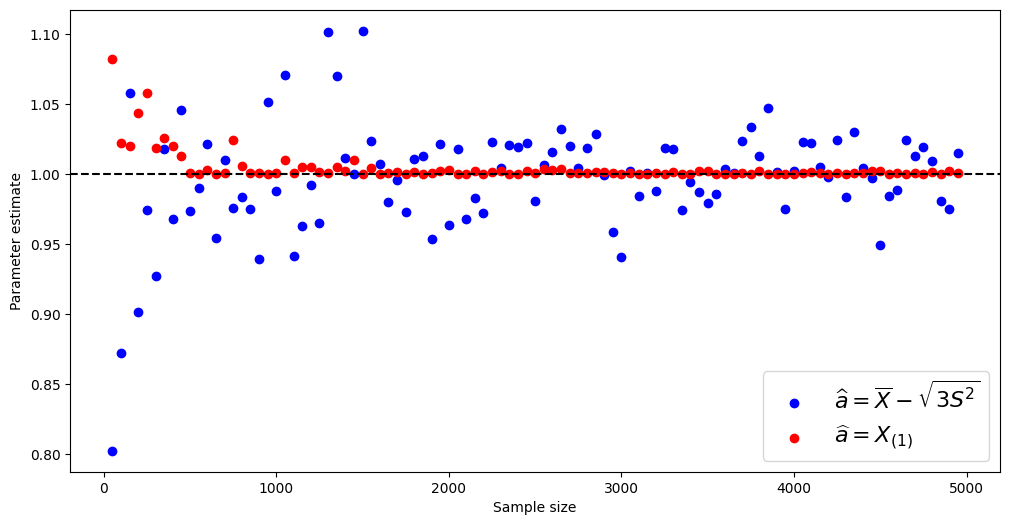

In [6]:
# @title Эксперименты
# Plt params
plt.rcParams['text.usetex'] = True
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
np.random.seed(42)
plt.figure(figsize=(12, 6))

# Parameters
a = 1
b = 5
max_sample_size = 5000
step = 50
theta_arr = []
theta_arr_2 = []

# Generation
for sample_size in tqdm(range(step, max_sample_size, step)):
    sample = np.random.uniform(a,b, size = sample_size)
    theta_arr.append(sample.mean() - np.sqrt(3*sample.var()))
    theta_arr_2.append(sample.min())


# Plotting
plt.scatter(list(range(step, max_sample_size, step)), theta_arr, color = 'blue', label=r'$\widehat a = \overline{X} - \sqrt{3 S^2}$')
plt.scatter(list(range(step, max_sample_size, step)), theta_arr_2, color = 'red', label=r'$\widehat{a} = X_{(1)}$')
plt.axhline(y = a, color = 'black', linestyle = '--')
plt.xlabel('Sample size')
plt.ylabel('Parameter estimate')
plt.legend(prop={'size': 16}, loc=4)
plt.show()

## Задача 6

Пусть $X_1, X_2, ..., X_n$ — выборка из показательного распределения $\mathsf{Exp}_\theta$ с параметром $\theta > 0$. Построить оценки параметра:
1. Методом моментов (по произвольному $k$-ому моменту).
2. Методом максимального правдоподобия.



### Решение

**ММ**

Если генеральная совокупность $\xi$ имеет показательное распределение $ \mathsf{Exp}_\theta$, то

$$
f_\xi(t) = \begin{cases}
 0, & t < 0 \\
 \theta e^{-\theta t}, & t \geq 0
 \end{cases},
$$

а тогда

$$
\mathsf E_\theta X_1^k = \theta \int\limits_0^{+\infty} t^k e^{-\theta  t}dt.
$$

Сделав в последнем интеграале замену $\theta t = p$, получим

$$
\mathsf E_\theta X_1^k = \frac{1}{\theta^k} \int\limits_0^{+\infty} p^k e^{-p}dp = \frac{k!}{\theta^k},
$$

откуда

$$
\widehat{\theta_k} = \sqrt[k]{\frac{k!}{\overline{X^k}}}.
$$

**ММП**

Так как функция правдоподобия имеет вид

$$
f_\theta (\vec{X}) = \begin{cases}
 \theta^n e^{-\theta n \overline{X}}, & X_{(1)} > 0\\
 0, & \text{иначе}
 \end{cases},
$$

то максимум логично искать, как максимум функции $ \theta^n e^{-\theta n \overline{X}}$. Ее производная  (по $\theta$) равна

$$
n \theta^{n - 1}e^{-\theta n \overline{X}} - \theta^n  n \overline{X}e^{-\theta n \overline{X}},
$$

а из равенства нулю производной получаем $\theta = \frac{1}{\overline{X}}$. Легко проверить, что это и правда точка максимума, а значит

$$
\widehat \theta = \frac{1}{\overline{X}}.
$$

  0%|          | 0/99 [00:00<?, ?it/s]

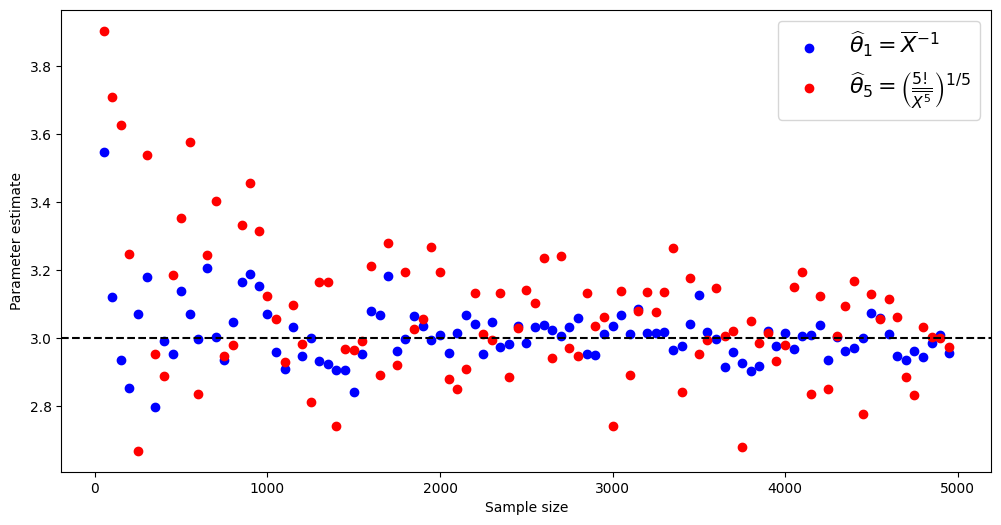

In [7]:
# @title Эксперименты
# Plt params
plt.rcParams['text.usetex'] = True
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
np.random.seed(42)
plt.figure(figsize=(12, 6))

# Parameters
p = 3
k = 5
max_sample_size = 5000
step = 50
theta_arr = []
theta_arr_2 = []


# Generation
for sample_size in tqdm(range(step, max_sample_size, step)):
    sample = np.random.exponential(1/p, size = sample_size)
    theta_arr.append(1/sample.mean())
    theta_arr_2.append((math.factorial(k)/(sample**k).mean())**(1/k))


# Plotting
plt.scatter(list(range(step, max_sample_size, step)), theta_arr, color = 'blue', label=r'$\widehat{\theta}_1 = \overline{X}^{-1}$')
plt.scatter(list(range(step, max_sample_size, step)), theta_arr_2, color = 'red', label=r'$\widehat{\theta}_5 = \left( \frac{5!}{\overline{X^5}} \right)^{1/5}$')
plt.axhline(y = p, color = 'black', linestyle = '--')
plt.xlabel('Sample size')
plt.ylabel('Parameter estimate')
plt.legend(prop={'size': 16})
plt.show()

## Задача 7

Пусть $X_1, X_2, ..., X_n$ — выборка из генеральной совокупности $\xi$, распределение которой задается функцией распределения

$$
F_\xi(x)=\begin{cases}0,&x< 0\\x^\theta,&0\leq x<1\\1,&x\geq 1\end{cases}, \quad\quad \theta >1.
$$

Построить оценки параметра:
1. Методом моментов.
2. Методом максимального правдоподобия.

### Решение

**ММ**
    
Для того чтобы начать находить моменты, сначала найдем

$$
f_\xi(x)=F'_\xi(x)=\begin{cases}0,&x\notin [0,1)\\\theta x^{\theta-1},&x\in[0,1)\end{cases}
$$

Проверим, что $\xi$ имеет абсолютно непрерывное распределение:

$$
\int\limits_{-\infty}^{+\infty} f_\xi \ dx = \int\limits_0^1 \theta x^{\theta-1} \ dx = 1.
$$

Начнем вычислять моменты

$$
\mathsf E\xi=\int\limits_{-\infty}^{+\infty}x\cdot f(x)dx=\dfrac{\theta}{\theta+1}x^\theta\bigg|_{0}^{1}=\dfrac{\theta}{\theta+1}
$$

Вообще, отсюда видно, что

$$
\mathsf E\xi^k=\dfrac{\theta}{\theta+k}\quad\Rightarrow\quad \widehat\theta_k=\dfrac{k\overline{X^k}}{1-\overline{X^k}}
$$
    


**ММП**
    
$$
f_\xi(x)=\begin{cases}0,&x\notin [0,1)\\\theta x^{\theta-1},&x\in[0,1)\end{cases}
$$

$$
f_{\theta}(\vec{X})=\prod\limits_{i=1}^n\theta X_i^{\theta -1}
$$

$$
L_{\theta}(\vec{X})=n\ln\theta +(\theta -1)\cdot\sum\limits_{i=1}^n\ln X_i
$$

$$
L'_{\theta}(\vec{X})=\dfrac{n}{\theta}+\sum\limits_{i=1}^n\ln X_i\quad\Rightarrow\quad \widehat\theta= - \dfrac{n}{\sum\limits_{i=1}^n \ln X_i}
$$

  0%|          | 0/99 [00:00<?, ?it/s]

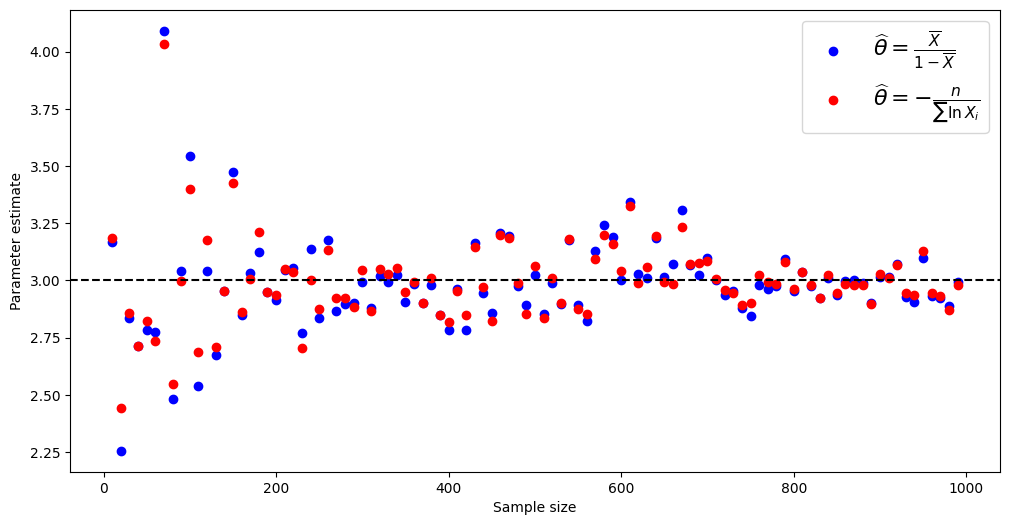

In [8]:
# @title Эксперименты
# SPS Custom function
class custom_dist(sps.rv_continuous):
    def _pdf(self, x):
        return p*x**(p-1)

distr = custom_dist(a=0, b=1, name='custom_distribution')

# Plt params
plt.rcParams['text.usetex'] = True
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
np.random.seed(42)
plt.figure(figsize=(12, 6))

# Parameters
p = 3
max_sample_size = 1000
step = 10
theta_arr = []
theta_arr_2 = []

# Generation
for sample_size in tqdm(range(step, max_sample_size, step)):
    sample = distr.rvs(size=sample_size)
    theta_arr.append(sample.mean() / (1-sample.mean()))
    theta_arr_2.append(-sample_size / np.log(sample).sum())

# Plotting
plt.scatter(list(range(step, max_sample_size, step)), theta_arr, color='blue',
            label=r'$\widehat{\theta} = \frac{\overline{X}}{1 - \overline{X}}$')

plt.scatter(list(range(step, max_sample_size, step)), theta_arr_2, color='red',
            label=r'$\widehat{\theta} = -\frac{n}{\sum \ln X_i}$')

plt.axhline(y=p, color='black', linestyle='--')
plt.xlabel('Sample size')
plt.ylabel('Parameter estimate')
plt.legend(prop={'size': 16})
plt.show()